In [303]:
import os
import scipy.io
import numpy as np 
import pandas as pd
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from bidi.algorithm import get_display
from arabic_reshaper import reshape
from torchvision import transforms

# 1- EDA - Classification

In [304]:
def hstacked_images(img_dir, num_col, saving_path, saving_name, gray=False, input_size=240, skip_prob=0.9):
    hstacked = list()
    current_hstacked = None
    hstacked_counter = 0
    resize_transform = transforms.Resize((input_size, input_size))
    with tqdm(os.listdir(img_dir)) as t_dir:
        for img_name in t_dir:
            skip=False
            if np.random.rand()<skip_prob:
                continue
            
            img_path = os.path.join(img_dir, img_name)
            img = Image.open(img_path)
            img = resize_transform(img)
            np_img = np.array(img)
            
            if (gray and len(np_img.shape)==3) or ( (not gray) and len(np_img.shape)==2 ):
                skip=True

                
                
            
#             print(np_img.shape, skip)
            
            if not skip:
                hstacked_counter+=1

                if current_hstacked is None:
                    current_hstacked = img
                else:
                    current_hstacked = np.hstack( [current_hstacked, img] )

                if hstacked_counter == num_col:
                    hstacked_counter = 0
                    hstacked.append(current_hstacked)
                    current_hstacked = None
                
    vstacked = np.vstack(hstacked)
    Image.fromarray(vstacked).save(os.path.join(saving_path, f"{saving_name}.png"))

In [305]:
train_base_data_path = "../datasets/stanford_car_196/cars_train"
test_base_data_path = "../datasets/stanford_car_196/cars_test"

## 1.1- Train & Validation Dataset

In [244]:
hstacked_images(
                img_dir=train_base_data_path, 
                num_col=40, 
                saving_path="../plots/EDA", 
                saving_name="training_all",
                input_size=64)

100%|██████████| 8144/8144 [00:07<00:00, 1036.43it/s]


In [306]:
df_train = pd.read_csv("../datasets/stanford_car_196/train.csv")
df_train.drop(columns=["Unnamed: 0"], inplace=True)

df_val = df_train[ df_train["train/val"]=="val" ]
df_train = df_train[ df_train["train/val"]=="train" ]

df_train.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,file_name,gray_scale,label,train/val
0,39,116,569,375,00001.jpg,False,13,train
1,36,116,868,587,00002.jpg,False,2,train
2,85,109,601,381,00003.jpg,False,90,train
3,621,393,1484,1096,00004.jpg,False,133,train
4,14,36,133,99,00005.jpg,False,105,train


In [312]:
print("Number of Images:")
print("Training: ", df_train.shape)
print("Validation: ", df_val.shape)

Number of Images:
Train:  (6598, 8)
Validation:  (1546, 8)


In [316]:
print("Number of Gray-Scaled Images:")
print("Training: ", df_train[ df_train["gray_scale"] ].shape)
print("Validation: ", df_val[ df_val["gray_scale"] ].shape)

Number of Gray-Scaled Images:
Training:  (14, 8)
Validation:  (4, 8)


### 1.1.1- Train Dataset

In [247]:
df_train_label = df_train[["file_name", "label"]].groupby(by="label").count()
df_train_label.rename(columns={"file_name": "count"}, inplace=True)
df_train_label

,count
label,
0,36
1,26
2,35
3,34
4,33
...,...
191,35
192,34
193,37


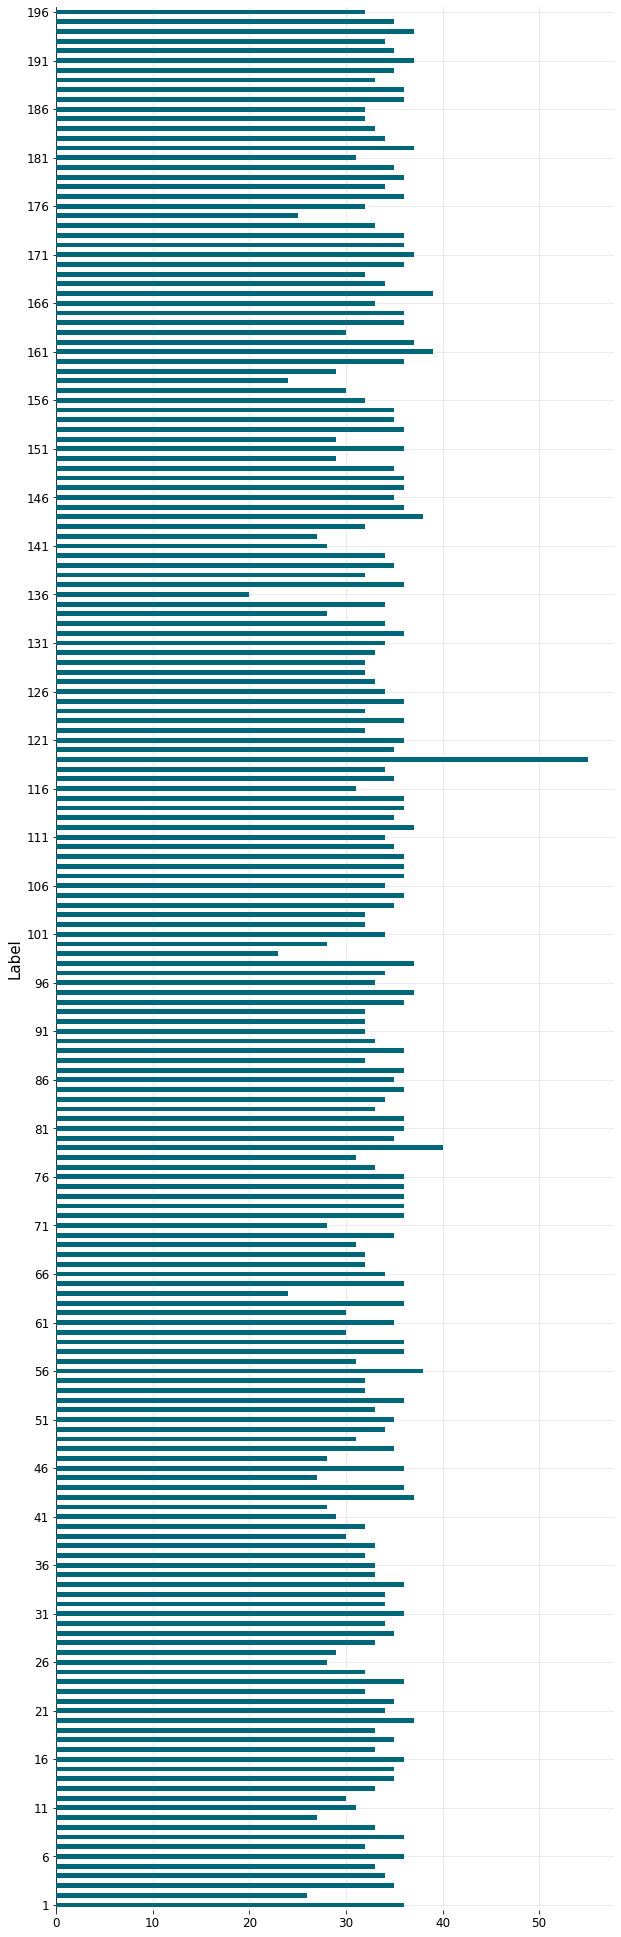

In [269]:
df_train_label.plot.barh(figsize=(10,35), color="#006778", zorder=5)

ax = plt.gca()

plt.grid(zorder=0, alpha=0.3)
plt.yticks(np.arange(0,196,5), np.arange(1,197, 5), size=12)
plt.ylabel("Label", size=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(size=12)

ax.get_legend().remove()

plt.savefig("../plots/EDA/train_data_distribution.png")

plt.show()

In [270]:
df_train_label.median()

count    34.0
dtype: float64

In [271]:
df_train_label.mean()

count    33.663265
dtype: float64

### 1.1.2- Validation Dataset

In [272]:
df_val_label = df_val[["file_name", "label"]].groupby(by="label").count()
df_val_label.rename(columns={"file_name": "count"}, inplace=True)
df_val_label

,count
label,
0,9
1,6
2,8
3,8
4,8
...,...
191,8
192,8
193,9


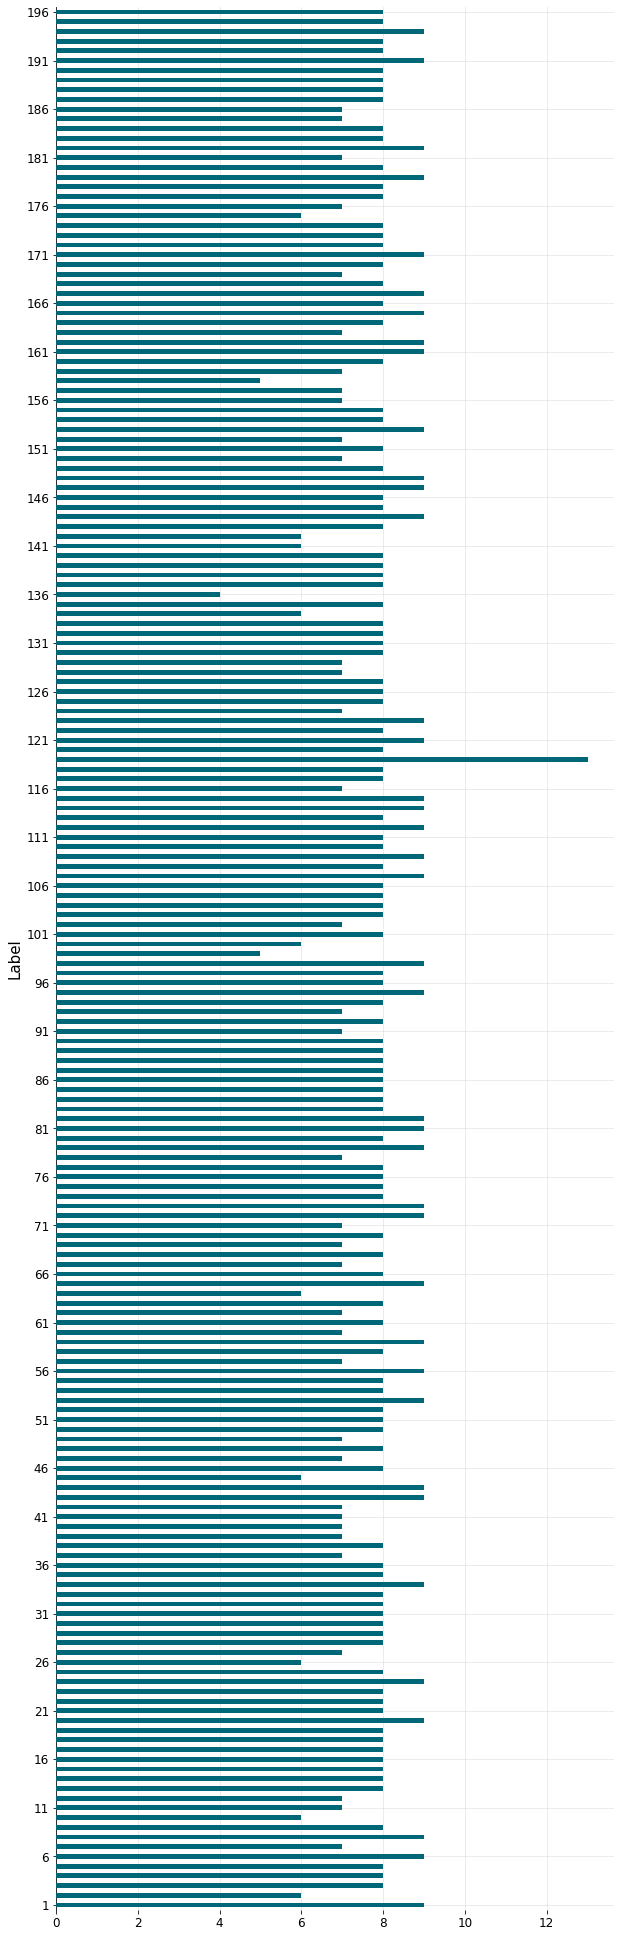

In [273]:
df_val_label.plot.barh(figsize=(10,35), color="#006778", zorder=5)

ax = plt.gca()

plt.grid(zorder=0, alpha=0.3)
plt.yticks(np.arange(0,196,5), np.arange(1,197, 5), size=12)
plt.ylabel("Label", size=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(size=12)

ax.get_legend().remove()

plt.savefig("../plots/EDA/validation_data_distribution.png")

plt.show()

In [274]:
df_val_label.median()

count    8.0
dtype: float64

In [275]:
df_val_label.mean()

count    7.887755
dtype: float64

## 1.2- Test Dataset

In [245]:
hstacked_images(
                img_dir=test_base_data_path, 
                num_col=40, 
                saving_path="../plots/EDA/", 
                saving_name="test_all",
                input_size=64)

100%|██████████| 8041/8041 [00:08<00:00, 978.52it/s] 


In [309]:
df_test = pd.read_csv("../datasets/stanford_car_196/test.csv")
df_test.drop(columns=["Unnamed: 0"], inplace=True)

df_test.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,file_name,gray_scale,label
0,30,52,246,147,00001.jpg,False,180
1,100,19,576,203,00002.jpg,False,102
2,51,105,968,659,00003.jpg,False,144
3,67,84,581,407,00004.jpg,False,186
4,140,151,593,339,00005.jpg,False,184


In [318]:
print("Number of Images:")
print("Test: ", df_test.shape)

Number of Images:
Test:  (8041, 7)


In [320]:
print("Number of Gray-Scaled Images:")
print("Test: ", df_test[ df_test["gray_scale"] ].shape)

Number of Gray-Scaled Images:
Test:  (16, 7)


### Train Dataset

In [277]:
df_test_label = df_test[["file_name", "label"]].groupby(by="label").count()
df_test_label.rename(columns={"file_name": "count"}, inplace=True)
df_test_label

,count
label,
0,44
1,32
2,43
3,42
4,40
...,...
191,42
192,41
193,45


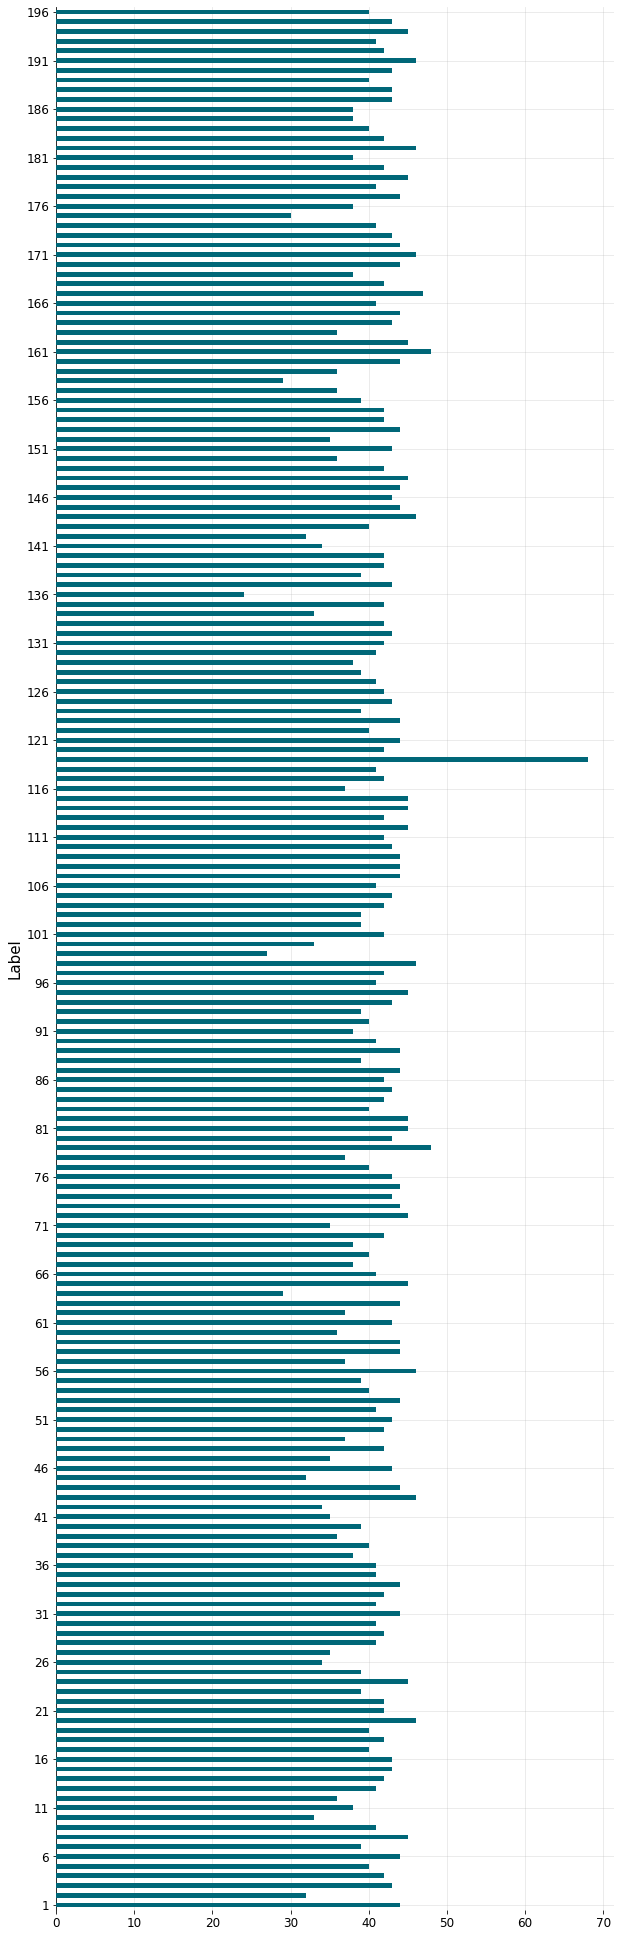

In [278]:
df_test_label.plot.barh(figsize=(10,35), color="#006778", zorder=5)

ax = plt.gca()

plt.grid(zorder=0, alpha=0.3)
plt.yticks(np.arange(0,196,5), np.arange(1,197, 5), size=12)
plt.ylabel("Label", size=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(size=12)

ax.get_legend().remove()

plt.savefig("../plots/EDA/test_data_distribution.png")

plt.show()

In [279]:
df_test_label.median()

count    42.0
dtype: float64

In [280]:
df_test_label.mean()

count    41.02551
dtype: float64

# 2- Normalization Calculation

In [300]:
images_mean_std = np.empty(shape=(df_train.shape[0], 8))

with tqdm(df_train["file_name"]) as t_files:
    for ix, file_name in enumerate(t_files):
        
        image_rgb = Image.open(os.path.join(train_base_data_path, file_name)).convert("RGB")
        image_rgb_mean = np.array(image_rgb).mean(axis=(0,1))
        image_rgb_std = np.array(image_rgb).std(axis=(0,1))
        
        
        image_gray = Image.open(os.path.join(train_base_data_path, file_name)).convert("LA")
        image_gray_mean = np.array(image_gray).mean()
        image_gray_std = np.array(image_gray).std()
        
        images_mean_std[ix] = [*image_rgb_mean, *image_rgb_std, image_gray_mean, image_gray_std]

100%|██████████| 6598/6598 [07:35<00:00, 14.48it/s]


In [301]:
print(images_mean_std.shape)
print(images_mean_std)

(6598, 8)
[[119.630625   134.92611667 141.25956667 ...  61.68556692 193.0446875
   75.94371322]
 [123.73164774 122.38232593 121.03034897 ...  63.61021689 188.81589794
   79.77115735]
 [126.50849284 106.19602539  94.77146484 ...  57.56162859 182.98913574
   81.77378608]
 ...
 [113.81519444 114.45786728 111.47114506 ...  60.53833859 184.45874691
   83.2969829 ]
 [131.0944772  134.53214754 136.5704468  ...  67.39873774 194.37189793
   76.99979564]
 [120.81358958 116.28951458  93.67148333 ...  50.33836192 185.00786562
   79.60910924]]


In [302]:
images_mean_std.mean(axis=0) / 255

array([0.47111569, 0.46027254, 0.45509645, 0.26696136, 0.26605469,
       0.27066467, 0.73146184, 0.33044991])

# 3- Data Augmentation

In [321]:
input_width, input_height = 240, 240

In [322]:
train_transforms = transforms.Compose([transforms.Resize((input_width, input_height)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(15),
                                       ])

In [325]:
train_sample = df_train.sample()
train_sample

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,file_name,gray_scale,label,train/val
6348,30,17,620,425,06349.jpg,False,148,train


In [512]:
file_name = df_train.sample()["file_name"].values[0]
try_counter=4
# file_name = "00277.jpg"
print(file_name)

04411.jpg


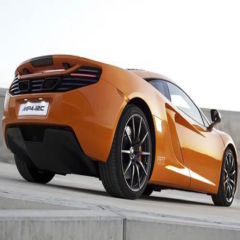

In [513]:
image = Image.open(os.path.join(train_base_data_path, file_name))
image = transforms.Resize((input_width, input_height))(image)
image.save("../plots/data_loader/data_augmentation_0{}_0.png".format(try_counter))
image

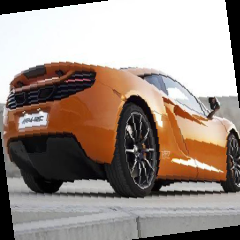

In [514]:
img1 = train_transforms(image)
img1.save("../plots/data_loader/data_augmentation_0{}_1.png".format(try_counter))
img1

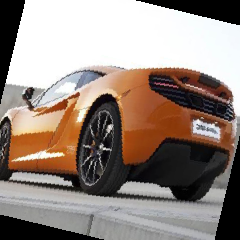

In [515]:
img2 = train_transforms(image)
img2.save("../plots/data_loader/data_augmentation_0{}_2.png".format(try_counter))
img2

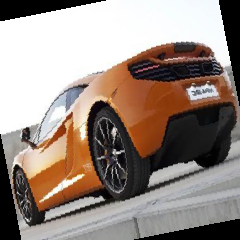

In [516]:
img3 = train_transforms(image)
img3.save("../plots/data_loader/data_augmentation_0{}_3.png".format(try_counter))
img3

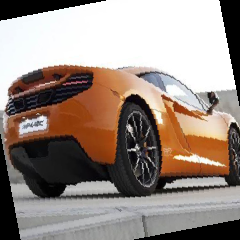

In [517]:
img4 = train_transforms(image)
img4.save("../plots/data_loader/data_augmentation_0{}_4.png".format(try_counter))
img4